In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import h5py
from six.moves import range

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

In [2]:
import sys
sys.path.append('/Users/perdue/Documents/MINERvA/AI/ANNMINERvA/')

from evtid_utils import decode_eventid
from mnvtf.reader_sqlite import MnvCategoricalSQLiteReader
from mnvtf.reader_text import MnvCategoricalTextReader

In [3]:
from mnvdlplot.conf_mat_pl import make_conf_mat_plots_rowcolnormonly
from mnvdlplot.conf_mat_pl import make_conf_mat_plots_raw

In [40]:
PLAYLIST = 'me1Nmc'

In [41]:
PROCESSING = '201804'

In [42]:
h5path = '/Users/perdue/Documents/MINERvA/AI/hdf5/{}/'.format(PROCESSING)
h5name = h5path + 'hadmultkineimgs_127x94_{}.hdf5'.format(PLAYLIST)
h5file = h5py.File(h5name, 'r')

In [43]:
dbpath = '/Users/perdue/Documents/MINERvA/AI/prediction_dbs/tensorflow/{}/'.format(PROCESSING)
dbname = dbpath + 'mnv_st_epsilon_predictionsME1NMC_model_20180403_def_chngdpad_planecodes_nclass174_trainME1LOPMC_validME1LOPMC_testME1LOPMC_optADAM_batchsz1024_nodoBatchNorm_tev.txt.gz'
n_classes = 174
reader_mc = MnvCategoricalTextReader(dbname)

In [50]:
mcgen = reader_mc.read_data_generator()
n_events = 1

In [51]:
do_water_target_area_check = False
csv_file_name = '{}_valid_predcheck.csv'.format(PLAYLIST)

if do_water_target_area_check:
    outfil = open(csv_file_name, 'w')
    outfil.write('# eventid,predicted,true\n')

    for i, d in enumerate(mcgen):
        evtid = int(d[0])
        pred_seq = d[1]
        probs_list = d[2]
        found_idx = np.where(h5file['event_data']['eventids'][:] == evtid)[0]
        if len(found_idx):
            found_idx = found_idx[0]
            outfil.write('{},{},{}\n'.format(
                evtid, pred_seq, h5file['vtx_data']['planecodes'][found_idx][0]
            ))

    outfil.close()

In [52]:
if do_water_target_area_check:
    evtpcodes = pd.read_csv('./' + csv_file_name, header=0, names=['eventid', 'predicted', 'true'])
    print(evtpcodes.head())
    dfrec0 = evtpcodes[evtpcodes['predicted'] == 0]
    print(len(dfrec0))
    
    fig = plt.figure(figsize=(8, 6))
    n, bins, patches = plt.hist(dfrec0['true'][:], bins=173, range=(0, 172))
    ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')

In [53]:
if do_water_target_area_check:
    tidx = dfrec0['true'] > 25
    tidx &=  dfrec0['true'] < 51
    dfrec0t25_50 = dfrec0[tidx]
    fig = plt.figure(figsize=(8, 6))
    n, bins, patches = plt.hist(dfrec0t25_50['true'][:], bins=173, range=(0, 172))
    ax = plt.gca()
    ax.set_yscale("log", nonposy='clip')
    print(len(dfrec0t25_50))
    for ev in dfrec0t25_50['eventid'][:20]:
        print(ev, decode_eventid(ev))
    with open('evtids.txt', 'w') as f:
        for ev in dfrec0t25_50['eventid']:
            print(ev, file=f)

In [54]:
confusion = np.zeros((n_classes, n_classes))
n_events = 25000

for i, d in enumerate(mcgen):
    if (i+1) % 1000 == 0:
        print(i)
    evtid = int(d[0])
    pred_seq = d[1]
    probs_list = d[2]
    found_idx = np.where(h5file['event_data']['eventids'][:] == evtid)[0]
    if len(found_idx):
        found_idx = found_idx[0]
    else:
        print('did not find evtid {}'.format(evtid))
        continue
    planecd = h5file['vtx_data']['planecodes'][found_idx]
    confusion[pred_seq, planecd] += 1
    # print(planecd, pred_seq)
    
    if i > n_events:
        break

999
1999
2999
3999
4999
5999
6999
7999
8999
9999
10999
11999
12999
13999
14999
15999
16999
17999
18999
19999
20999
21999
22999
23999
24999


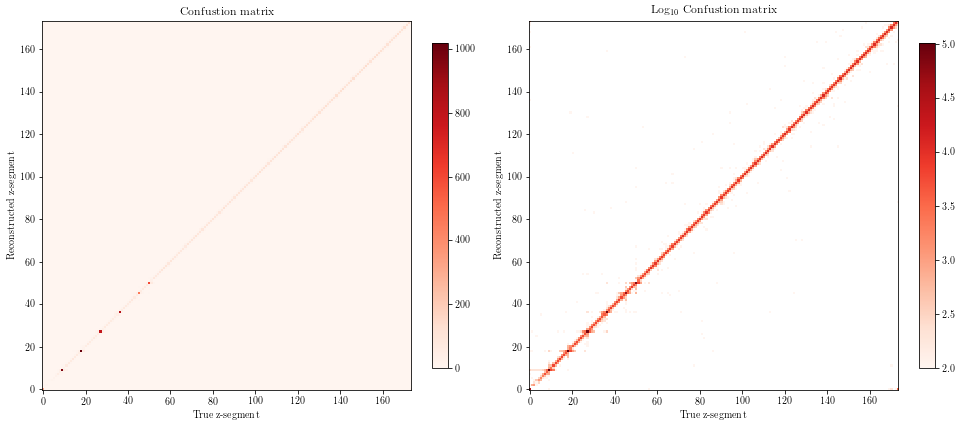

In [55]:
make_conf_mat_plots_raw(confusion, 'LOP_predcheck_N')

purity (row-normalized diagonal values)
target  6: purity = 0.912 +/- 0.009 (stat)
target  1: purity = 0.873 +/- 0.010 (stat)
target  2: purity = 0.883 +/- 0.009 (stat)
target  4: purity = 0.824 +/- 0.016 (stat)
target  5: purity = 0.829 +/- 0.014 (stat)
target  3: purity = 0.881 +/- 0.011 (stat)
efficiency (column-normalized diagonal values)
target  6: efficiency = 0.948 +/- 0.008 (stat)
target  1: efficiency = 0.961 +/- 0.006 (stat)
target  2: efficiency = 0.965 +/- 0.006 (stat)
target  4: efficiency = 0.902 +/- 0.013 (stat)
target  5: efficiency = 0.929 +/- 0.010 (stat)
target  3: efficiency = 0.952 +/- 0.007 (stat)


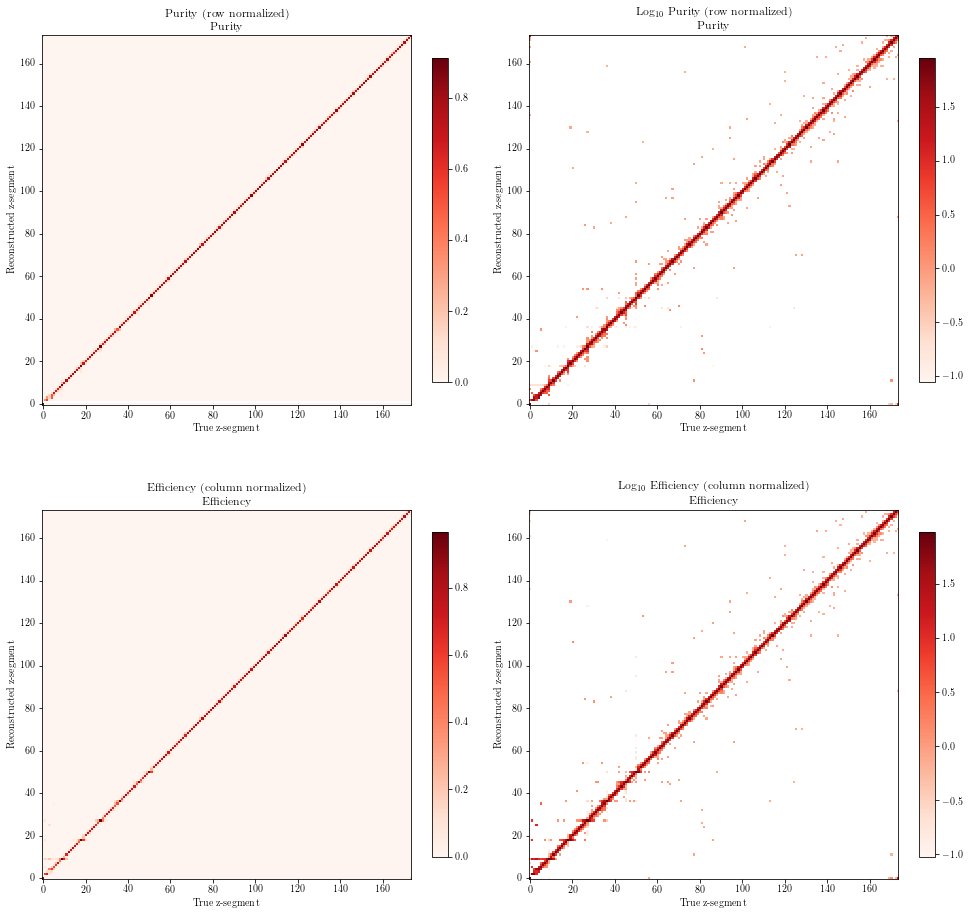

In [56]:
make_conf_mat_plots_rowcolnormonly(confusion, 'LOP_predcheck_N')

In [39]:
h5file.close()